Fake Database

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))
df_fake = pd.DataFrame(df)
df_fake

Saving Fake.csv to Fake.csv


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


True Database

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df_2= pd.read_csv(io.BytesIO(uploaded['True.csv']))
df_true = pd.DataFrame(df_2)
df_true

Saving True.csv to True.csv


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Merge



In [3]:
df= pd.read_csv('Fake.csv')
df_fake = pd.DataFrame(df)
frames = [df_true, df_fake]
true_fake = pd.concat(frames)
display(true_fake)



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
df_fake= pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')
df_true['is_fake'] = 0
df_fake['is_fake'] = 1
df_final = pd.concat([df_true, df_fake]).reset_index(drop = True)
df_final
df_final['all_text'] = df['title'] + df['text']




In [5]:
import nltk
import gensim
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import re

nltk.download('punkt');
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]  
df_final['tokenized'] = df_final.apply(lambda x: tokenize(x['title']), axis=1)
df_final[['title', 'tokenized']].head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,title,tokenized
0,"As U.S. budget fight looms, Republicans flip t...","[As, budget, fight, looms, Republicans, flip, ..."
1,U.S. military to accept transgender recruits o...,"[military, to, accept, transgender, recruits, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,"[Senior, Republican, senator, Mueller, do, his..."
3,FBI Russia probe helped by Australian diplomat...,"[FBI, Russia, probe, helped, by, Australian, d..."
4,Trump wants Postal Service to charge 'much mor...,"[Trump, wants, Postal, Service, to, charge, mo..."


In [6]:
df_final[['tokenized']].head(20)


,tokenized
0,"[As, budget, fight, looms, Republicans, flip, ..."
1,"[military, to, accept, transgender, recruits, ..."
2,"[Senior, Republican, senator, Mueller, do, his..."
3,"[FBI, Russia, probe, helped, by, Australian, d..."
4,"[Trump, wants, Postal, Service, to, charge, mo..."
5,"[White, House, Congress, prepare, for, talks, ..."
6,"[Trump, says, Russia, probe, will, be, fair, b..."
7,"[Factbox, Trump, on, Twitter, Dec, Approval, r..."
8,"[Trump, on, Twitter, Dec, Global, Warming]"
9,"[Alabama, official, to, certify, Jones, today,..."


[]

In [7]:
from nltk.corpus import stopwords
#def remove_english_stopwords_func(text):
  #t = [token for token in text if token.lower() not in stopwords.words("english")]   
  #return t
#df_final['stopwords_removed'] = df_final['tokenized'].apply(remove_english_stopwords_func)
#df_final['stopwords_removed'] = df_final.apply(lambda x: remove_english_stopwords_func(x['tokenized']), axis=1)
def remove_stopwords(column_2):
  #stops = set(stopwords.words("english"))
  x=[token for token in column_2 if token.lower() not in stopwords.words("english")]
  text = ' '.join(x)   
  return text
#df_final['stopwords_removed'] = df_final['text'].apply(remove_stopwords)
df_final['stopwords_removed'] = df_final.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
#df_final[['title', 'stopwords_removed']].head()
#item for item in x if item.lower() not in stop_words

df_final
    

  

,title,text,subject,date,is_fake,all_text,tokenized,stopwords_removed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...,"[As, budget, fight, looms, Republicans, flip, ...",budget fight looms Republicans flip fiscal script
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,Drunk Bragging Trump Staffer Started Russian ...,"[military, to, accept, transgender, recruits, ...",military accept transgender recruits Monday Pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Sheriff David Clarke Becomes An Internet Joke...,"[Senior, Republican, senator, Mueller, do, his...",Senior Republican senator Mueller job
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...,"[FBI, Russia, probe, helped, by, Australian, d...",FBI Russia probe helped Australian diplomat NYT
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Pope Francis Just Called Out Donald Trump Dur...,"[Trump, wants, Postal, Service, to, charge, mo...",Trump wants Postal Service charge Amazon shipm...
...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,NaN,"[McPain, John, McCain, Furious, That, Iran, Tr...",McPain John McCain Furious Iran Treated US Sai...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,NaN,"[JUSTICE, Yahoo, Settles, Privacy, for, Lawyer...",JUSTICE Yahoo Settles Privacy Lawyers Users
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,NaN,"[Sunnistan, US, and, Allied, Safe, Zone, Plan,...",Sunnistan US Allied Safe Zone Plan Take Territ...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,NaN,"[How, to, Blow, Million, Al, Jazeera, America,...",Blow Million Al Jazeera America Finally Calls ...


In [11]:
def apply_stemming(tokenized_column):
  stemmer = PorterStemmer() 
  return [stemmer.stem(word).lower() for word in tokenized_column]
df_final['porter_stemmed'] = df_final.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
df_final[['title', 'porter_stemmed']].head()
def rejoin_words(tokenized_column):
    return ( "".join(tokenized_column))
df_final['all_text'] = df_final.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
df_final[['title', 'all_text']].head()

,title,all_text
0,"As U.S. budget fight looms, Republicans flip t...",budget fight looms republicans flip fiscal script
1,U.S. military to accept transgender recruits o...,military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator mueller job
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat nyt
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge amazon shipm...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = df_final['all_text']
y = df_final['is_fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

bundled_pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())])
bundled_pipeline.fit(X_train, y_train)

import pandas as pd
from sklearn.model_selection import cross_validate

cv_results = cross_validate(bundled_pipeline, X_train, y_train, return_estimator=True)
#pd.DataFrame(cv_results)
#y_pred = bundled_pipeline.predict(X_test)

#print(classification_report(y_test, y_pred))
#print('Accuracy:',accuracy_score(y_test, y_pred))
#print('F1 score:',f1_score(y_test, y_pred))
#print('ROC/AUC score:',roc_auc_score(y_test, y_pred))

In [17]:
, PassiveAggressiveRegressor
# Importing modules
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
  
  
# Creating model
model_passive = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
  
# Fitting model 
bundled_pipeline_passive = Pipeline([("tfidf", TfidfVectorizer()), ("model", PassiveAggressiveClassifier())])
bundled_pipeline_passive.fit(X_train, y_train)

# Making prediction on test set
test_pred = bundled_pipeline_passive.predict(X_test)
  
# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred) * 100} %\n\n")  
  
print(f"Classification Report : \n\n{classification_report(y_test, test_pred)}")

Test Set Accuracy : 93.45953971789162 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6462
           1       0.93      0.94      0.94      7008

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [18]:
#Cross Validation
from sklearn.model_selection import train_test_split


import pandas as pd
from sklearn.model_selection import cross_validate
cv_results = cross_validate(bundled_pipeline_passive, X, y, return_estimator=True)
pd.DataFrame(cv_results)

,fit_time,score_time,estimator,test_score
0,0.560106,0.085773,"(TfidfVectorizer(), PassiveAggressiveClassifie...",0.878174
1,0.556308,0.088609,"(TfidfVectorizer(), PassiveAggressiveClassifie...",0.890089
2,0.544524,0.095577,"(TfidfVectorizer(), PassiveAggressiveClassifie...",0.921047
3,0.564497,0.098007,"(TfidfVectorizer(), PassiveAggressiveClassifie...",0.955229
4,0.541253,0.104511,"(TfidfVectorizer(), PassiveAggressiveClassifie...",0.895311


    fit_time  score_time  test_score  train_score
0   0.883864    0.154803   -0.059688    -0.000278
1   0.914490    0.152771   -0.055791    -0.000306
2   0.909987    0.147295   -0.058463    -0.000251
3   0.865435    0.148379   -0.058352    -0.000501
4   0.878467    0.147955   -0.056904    -0.000418
5   0.846905    0.148376   -0.056904    -0.000306
6   0.819234    0.151082   -0.054677    -0.000613
7   0.838578    0.153114   -0.059577    -0.000223
8   0.865818    0.163057   -0.056904    -0.000251
9   0.839108    0.152507   -0.058352    -0.000529
10  0.793282    0.141077   -0.054677    -0.000501
11  0.837248    0.148836   -0.055679    -0.000362
12  0.888010    0.149699   -0.062361    -0.000418
13  0.869194    0.150720   -0.057350    -0.000306
14  0.873616    0.143209   -0.058241    -0.000334
15  0.866435    0.167318   -0.066704    -0.000111
16  0.858432    0.138815   -0.056682    -0.000195
17  0.855211    0.149869   -0.055457    -0.000362
18  0.818238    0.146121   -0.057350    -0.000418


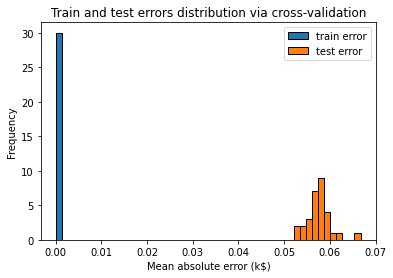

In [19]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(bundled_pipeline_passive, X, y,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
print (cv_results)

scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]
    
import matplotlib.pyplot as plt
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

In [25]:
print(classification_report(y_test, test_pred))
print('Accuracy:',accuracy_score(y_test, test_pred))
print('F1 score:',f1_score(y_test, test_pred))
print('ROC/AUC score:',roc_auc_score(y_test, test_pred))


from sklearn.metrics import mean_squared_error
import math
MSE=mean_squared_error(y_test, test_pred)
 
print("Root Mean Square Error:\n", MSE)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6462
           1       0.93      0.94      0.94      7008

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470

Accuracy: 0.9345953971789162
F1 score: 0.9375841303577753
ROC/AUC score: 0.9341893519755113
Root Mean Square Error:
 0.06540460282108389


In [2]:
from
nltk.download('punkt');
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]  
df_final['tokenized_text'] = df_final.apply(lambda x: tokenize(x['text']), axis=1)
df_final[['text', 'tokenized_text']].head()

NameError: ignored